<a href="https://colab.research.google.com/github/neekeshz/RL/blob/main/RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
!pip install stable-baselines3 --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
############################################################

In [ ]:
#####################

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a dummy dataset
data = {
    'Employee_ID': np.random.randint(1, 10, 100),
    'Task_ID': np.random.randint(1, 20, 100),
    'Task_Description': np.random.choice(['Write report', 'Code review', 'Team meeting', 'Design task', 'Client call'], 100),
    'Start_Time': pd.date_range(start='2023-01-01', periods=100, freq='H'),
    'End_Time': pd.date_range(start='2023-01-01', periods=100, freq='H') + pd.to_timedelta(np.random.randint(1, 3, 100), unit='H'),
    'Meeting_Count': np.random.randint(0, 5, 100),
    'Email_Count': np.random.randint(0, 10, 100),
    'Breaks_Taken': np.random.randint(0, 3, 100),
    'Satisfaction_Score': np.random.randint(1, 10, 100),
    'Productivity_Score': np.random.randint(50, 100, 100)
}

df = pd.DataFrame(data)
print(df.head())


   Employee_ID  Task_ID Task_Description          Start_Time  \
0            6       13      Code review 2023-01-01 00:00:00   
1            5       12      Design task 2023-01-01 01:00:00   
2            9        2      Design task 2023-01-01 02:00:00   
3            5        4      Client call 2023-01-01 03:00:00   
4            6        8     Team meeting 2023-01-01 04:00:00   

             End_Time  Meeting_Count  Email_Count  Breaks_Taken  \
0 2023-01-01 01:00:00              1            8             0   
1 2023-01-01 03:00:00              2            5             1   
2 2023-01-01 04:00:00              2            6             2   
3 2023-01-01 05:00:00              3            4             1   
4 2023-01-01 05:00:00              2            8             2   

   Satisfaction_Score  Productivity_Score  
0                   6                  96  
1                   1                  52  
2                   3                  64  
3                   6               

<ipython-input-1-ad19ba3c4c20>:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Start_Time': pd.date_range(start='2023-01-01', periods=100, freq='H'),
<ipython-input-1-ad19ba3c4c20>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'End_Time': pd.date_range(start='2023-01-01', periods=100, freq='H') + pd.to_timedelta(np.random.randint(1, 3, 100), unit='H'),
<ipython-input-1-ad19ba3c4c20>:11: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  'End_Time': pd.date_range(start='2023-01-01', periods=100, freq='H') + pd.to_timedelta(np.random.randint(1, 3, 100), unit='H'),


In [ ]:
# Normalize numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Meeting_Count', 'Email_Count', 'Breaks_Taken', 'Satisfaction_Score', 'Productivity_Score']] = scaler.fit_transform(
    df[['Meeting_Count', 'Email_Count', 'Breaks_Taken', 'Satisfaction_Score', 'Productivity_Score']])

# Create feature and target arrays
features = df[['Meeting_Count', 'Email_Count', 'Breaks_Taken']].values
target = df[['Satisfaction_Score', 'Productivity_Score']].values


In [ ]:
features

array([[0.25      , 0.88888889, 0.        ],
       [0.5       , 0.55555556, 0.5       ],
       [0.5       , 0.66666667, 1.        ],
       [0.75      , 0.44444444, 0.5       ],
       [0.5       , 0.88888889, 1.        ],
       [0.25      , 0.77777778, 0.5       ],
       [0.75      , 0.33333333, 0.5       ],
       [0.        , 0.88888889, 0.        ],
       [0.5       , 0.22222222, 0.        ],
       [0.5       , 0.        , 0.5       ],
       [0.75      , 0.66666667, 0.        ],
       [0.        , 0.22222222, 1.        ],
       [1.        , 0.44444444, 1.        ],
       [0.        , 0.66666667, 1.        ],
       [1.        , 0.55555556, 0.        ],
       [0.25      , 0.44444444, 0.        ],
       [0.        , 0.55555556, 1.        ],
       [0.5       , 0.11111111, 1.        ],
       [0.25      , 0.22222222, 1.        ],
       [0.25      , 0.66666667, 0.5       ],
       [0.        , 0.66666667, 0.        ],
       [0.75      , 1.        , 0.5       ],
       [0.

In [ ]:
target

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.75      , 0.40816327],
       [0.125     , 0.44897959],
       [0.5       , 0.        ],
       [0.75      , 0.46938776],
       [0.        , 0.65306122],
       [0.5       , 0.6122449 ],
       [0.5       , 0.63265306],
       [0.75      , 0.73469388],
       [0.25      , 0.85714286],
       [0.625     , 0.79591837],
       [0.625     , 1.        ],
       [0.5       , 0.6122449 ],
       [0.125     , 0.83673469],
       [0.75      , 0.59183673],
       [1.        , 0.75510204],
       [0.        , 0.02040816],
       [0.5       , 0.57142857],
       [1.        , 0.42857143],
       [1.        , 0.20408163],
       [0.875     , 0.32653061],
       [0.625     , 0.53061224],
       [0.125     , 0.71428571],
       [0.875     , 0.06122449],
       [0.625     , 0.10204082],
       [0.75      , 0.42857143],
       [0.25      , 0.53061224],
       [0.125     , 0.83673469],
       [0.625     , 0.95918367],
       [0.5       , 0.10204082],
       [0.125     , 0.53061224],
       [1.

In [ ]:
import gym
from gym import spaces

class OfficeEnv(gym.Env):
    def __init__(self):
        super(OfficeEnv, self).__init__()

        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)

        self.state = np.zeros(3)
        self.episode_length = 100
        self.current_step = 0

    def reset(self):
        self.state = np.zeros(3)
        self.current_step = 0
        return self.state

    def step(self, action):
        self.current_step += 1

        if action == 1:
            self.state[0] += 0.1
        elif action == 0:
            self.state[1] += 0.1
        elif action == 2:
            self.state[2] += 0.1

        # Adjusted reward function
        reward = 1 - 0.2 * self.state[0] - 0.2 * self.state[1] + 0.5 * self.state[2]
        done = self.current_step >= self.episode_length

        return self.state, reward, done, {}

    def render(self, mode='human'):
        pass


In [ ]:
class QLearningAgent:
    def __init__(self, state_space, action_space, learning_rate=0.001, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.995):
        self.state_space = state_space
        self.action_space = action_space
        self.q_table = np.zeros((state_space, action_space))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = 0.01
        self.total_rewards = []

    def choose_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.randint(self.action_space)

        discretized_state = tuple(int(min(s * 5, 4)) for s in state)  # Adjusted bins
        state_index = np.ravel_multi_index(discretized_state, (5, 5, 5))
        return np.argmax(self.q_table[state_index])

    def learn(self, state, action, reward, next_state):
        state = tuple(int(min(s * 5, 4)) for s in state)
        next_state = tuple(int(min(s * 5, 4)) for s in next_state)

        state_index = np.ravel_multi_index(state, (5, 5, 5))
        next_state_index = np.ravel_multi_index(next_state, (5, 5, 5))

        best_next_action = np.argmax(self.q_table[next_state_index])
        td_target = reward + self.discount_factor * self.q_table[next_state_index][best_next_action]
        td_error = td_target - self.q_table[state_index][action]
        self.q_table[state_index][action] += self.learning_rate * td_error

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def store_reward(self, total_reward):
        self.total_rewards.append(total_reward)


Streaming output truncated to the last 5000 lines.
Episode 5002/10000, Total Reward: 282.3599999999999
Episode 5003/10000, Total Reward: 287.8899999999999
Episode 5004/10000, Total Reward: 292.01999999999987
Episode 5005/10000, Total Reward: 292.01999999999987
Episode 5006/10000, Total Reward: 292.01999999999987
Episode 5007/10000, Total Reward: 292.01999999999987
Episode 5008/10000, Total Reward: 292.01999999999987
Episode 5009/10000, Total Reward: 285.5099999999999
Episode 5010/10000, Total Reward: 289.7099999999998
Episode 5011/10000, Total Reward: 289.49999999999983
Episode 5012/10000, Total Reward: 292.01999999999987
Episode 5013/10000, Total Reward: 286.20999999999987
Episode 5014/10000, Total Reward: 292.01999999999987
Episode 5015/10000, Total Reward: 292.01999999999987
Episode 5016/10000, Total Reward: 287.2599999999998
Episode 5017/10000, Total Reward: 285.64999999999986
Episode 5018/10000, Total Reward: 292.01999999999987
Episode 5019/10000, Total Reward: 287.1899999999998
E

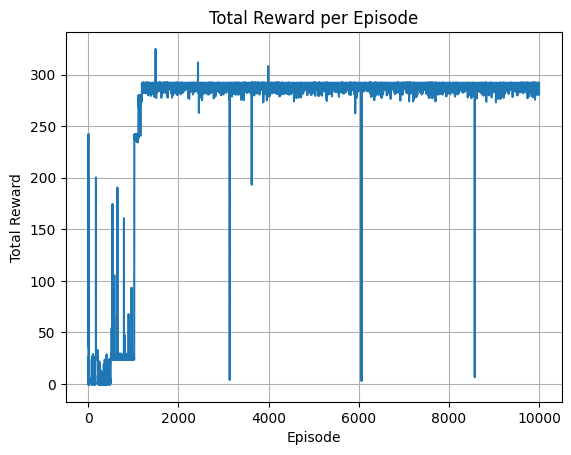

In [ ]:
# Initialize environment and agent
env = OfficeEnv()
# Increase the state space to accommodate discretized states
agent = QLearningAgent(state_space=10**env.observation_space.shape[0], action_space=env.action_space.n)

# Train the agent
episodes = 10000
for episode in range(episodes):
    state = env.reset()
    total_reward = 0

    for t in range(env.episode_length):
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.learn(state, action, reward, next_state)
        state = next_state
        total_reward += reward

        if done:
            break

    agent.store_reward(total_reward)
    print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

print("Training finished.")
np.save("q_table.npy", agent.q_table) #save the model

# Plotting the accuracy (total reward) over episodes
plt.plot(np.arange(len(agent.total_rewards)), agent.total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.grid(True)
plt.show()

In [ ]:
# Testing the trained agent
state = env.reset()
done = False
total_reward = 0

while not done:
    action = agent.choose_action(state)
    state, reward, done, _ = env.step(action)
    total_reward += reward
    env.render()

print(f"Total Reward during test: {total_reward}")

Total Reward during test: 284.3199999999999


In [ ]:
#updated
# Define the inference agent class
class InferenceAgent(QLearningAgent):
    def __init__(self, state_space, action_space, q_table):
        super().__init__(state_space, action_space)
        self.q_table = q_table

    def choose_action(self, state):
        discretized_state = tuple(int(min(s * 10, 9)) for s in state)
        state_index = np.ravel_multi_index(discretized_state, (10, 10, 10))
        return np.argmax(self.q_table[state_index])

# Initialize environment and load Q-table
env = OfficeEnv()
q_table = np.load('q_table.npy')  # Load the saved Q-table
agent = InferenceAgent(state_space=10**env.observation_space.shape[0], action_space=env.action_space.n, q_table=q_table)

# Run inference
state = env.reset()
done = False
total_reward = 0
step = 0

while not done:
    action = agent.choose_action(state)  # Choose action based on current state
    next_state, reward, done, _ = env.step(action)  # Take action and observe the result
    state = next_state  # Update state
    total_reward += reward  # Accumulate reward
    step += 1
    action_str = "Increase email count" if action == 0 else "Schedule meeting" if action == 1 else "Take break"
    print(f"Step: {step}, State: {state}, Action: {action_str}, Reward: {reward}")

print(f"Total Reward during inference: {total_reward}")

Step: 1, State: [0.  0.1 0. ], Action: Increase email count, Reward: 0.98
Step: 2, State: [0.  0.2 0. ], Action: Increase email count, Reward: 0.96
Step: 3, State: [0.  0.2 0.1], Action: Take break, Reward: 1.01
Step: 4, State: [0.  0.2 0.2], Action: Take break, Reward: 1.06
Step: 5, State: [0.  0.2 0.3], Action: Take break, Reward: 1.1099999999999999
Step: 6, State: [0.  0.2 0.4], Action: Take break, Reward: 1.16
Step: 7, State: [0.  0.2 0.5], Action: Take break, Reward: 1.21
Step: 8, State: [0.1 0.2 0.5], Action: Schedule meeting, Reward: 1.19
Step: 9, State: [0.1 0.3 0.5], Action: Increase email count, Reward: 1.17
Step: 10, State: [0.1 0.4 0.5], Action: Increase email count, Reward: 1.15
Step: 11, State: [0.1 0.5 0.5], Action: Increase email count, Reward: 1.13
Step: 12, State: [0.1 0.6 0.5], Action: Increase email count, Reward: 1.1099999999999999
Step: 13, State: [0.1 0.7 0.5], Action: Increase email count, Reward: 1.0899999999999999
Step: 14, State: [0.1 0.8 0.5], Action: Increa

In [ ]:
#deployment

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import gym
from gym import spaces
from sklearn.preprocessing import MinMaxScaler

# Define your OfficeEnv class (assuming it interacts with real-world data)
class OfficeEnv(gym.Env):
    def __init__(self):
        super(OfficeEnv, self).__init__()

        # Example: Define action and observation space
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)

        # Initialize state and episode parameters
        self.state = np.zeros(3)
        self.episode_length = 100
        self.current_step = 0

    def reset(self):
        self.state = np.zeros(3)
        self.current_step = 0
        return self.state

    def step(self, action):
        self.current_step += 1

        if action == 1:
            self.state[0] += 0.1
        elif action == 0:
            self.state[1] += 0.1
        elif action == 2:
            self.state[2] += 0.1

        # Adjusted reward function
        reward = 1 - 0.2 * self.state[0] - 0.2 * self.state[1] + 0.5 * self.state[2]
        done = self.current_step >= self.episode_length

        return self.state, reward, done, {}

    def take_action(self, action):
        # Implement method to execute action in real-world scenario
        # Example: Control actuators, update real-world state, etc.
        action_str = "Increase email count" if action == 0 else "Schedule meeting" if action == 1 else "Take break"
        print(f"Taking action in the real-world: {action_str}")
        # Implement actual control logic here based on the action

# Define your InferenceAgent class (inherits from QLearningAgent)
class InferenceAgent(QLearningAgent):
    def __init__(self, state_space, action_space, q_table):
        super().__init__(state_space, action_space)
        self.q_table = q_table

    def choose_action(self, state):
        # Override choose_action to adapt for real-world inference
        discretized_state = tuple(int(min(s * 10, 9)) for s in state)
        state_index = np.ravel_multi_index(discretized_state, (10, 10, 10))
        return np.argmax(self.q_table[state_index])

# Example deployment script for real-world inference
# def main():
#     # Initialize environment and load Q-table
#     env = OfficeEnv()
#     q_table = np.load('q_table.npy')  # Load the saved Q-table
#     agent = InferenceAgent(state_space=10**env.observation_space.shape[0], action_space=env.action_space.n, q_table=q_table)

#     # Run inference loop in the real-world scenario
#     done = False

#     while not done:
#         # Example: Obtain current state from real-world sensors or data
#         current_state = np.array([0.2, 0.4, 0.6])  # Example state from sensors

#         # Choose action using the inference agent
#         action = agent.choose_action(current_state)

#         # Execute action in the real-world environment
#         env.take_action(action)

#         # Optionally, receive feedback from environment
#         # Update current_state based on real-world feedback if needed

#         # Example: End condition based on real-world feedback
#         done = False  # Update with actual condition from the environment

#     print("Real-world deployment finished.")

# if __name__ == "__main__":
#     main()


In [ ]:
# Example deployment script for real-world inference with termination condition
def main():
    # Initialize environment and load Q-table
    env = OfficeEnv()
    q_table = np.load('q_table.npy')  # Load the saved Q-table
    agent = InferenceAgent(state_space=10**env.observation_space.shape[0], action_space=env.action_space.n, q_table=q_table)

    # Run inference loop in the real-world scenario
    done = False
    max_steps = 1000  # Example: Maximum steps to run

    step = 0
    while not done and step < max_steps:  # Termination condition based on max steps
        # Example: Obtain current state from real-world sensors or data
        current_state = np.array([0.2, 0.4, 0.6])  # Example state from sensors

        # Choose action using the inference agent
        action = agent.choose_action(current_state)

        # Execute action in the real-world environment
        env.take_action(action)

        # Optionally, receive feedback from environment
        # Update current_state based on real-world feedback if needed

        # Example: End condition based on real-world feedback
        # Adjust 'done' based on actual condition from the environment
        done = False  # Update with actual condition from the environment

        step += 1

    print("Real-world deployment finished.")

if __name__ == "__main__":
    main()


Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-world: Increase email count
Taking action in the real-wo